Sumber : https://www.audiolabs-erlangen.de/resources/MIR/FMP/C7/C7S3_Evaluation.html

A. Evaluasi untuk Unranked Retrieval Set

In [16]:
top_3 = {'doc7': 0.7689768599816609, 'doc1': 0.4641504133851462, 'doc4': 0.35626622628022314}
rel_judgement1 = {'doc1':1, 'doc2':0, 'doc3':0, 'doc4':1, 'doc5':1, 'doc6':0, 'doc7':1, 'doc8':1, 'doc9':0, 'doc10':0}
rel_docs = []
for doc_id, rel in rel_judgement1.items():
    if rel==1:
        rel_docs.append(doc_id)
retrieved_rel_doc3 = [value for value in list(top_3.keys()) if value in rel_docs]
prec3 = len(retrieved_rel_doc3)/len(top_3)*100
rec3 = len(retrieved_rel_doc3)/len(rel_docs)*100
fScore3 = 2 * prec3 * rec3 / (prec3 + rec3)
print(prec3, rec3, fScore3)

100.0 60.0 75.0


Kemudian hitung skor precision, recall, F-measure, jika dokumen yang dihasilkan oleh sistem information retrieval adalah 5 dokumen teratas.

In [17]:
top_5 = {'doc7': 0.7689768599816609, 'doc1': 0.4641504133851462, 'doc4': 0.35626622628022314, 'doc3': 0.10856998991379904, 'doc6': 0.10856998991379904}
rel_judgement1 = {'doc1':1, 'doc2':0, 'doc3':0, 'doc4':1, 'doc5':1, 'doc6':0, 'doc7':1, 'doc8':1, 'doc9':0, 'doc10':0}
rel_docs = []
for doc_id, rel in rel_judgement1.items():
    if rel==1:
        rel_docs.append(doc_id)
retrieved_rel_doc5 = [value for value in list(top_5.keys()) if value in rel_docs]
prec5 = len(retrieved_rel_doc5)/len(top_5)*100
rec5 = len(retrieved_rel_doc5)/len(rel_docs)*100
fScore5 = 2 * prec5 * rec5 / (prec5 + rec5)
print(prec5, rec5, fScore5)


60.0 60.0 60.0


B. Evaluasi untuk Ranked Retrieval Set

In [18]:
import numpy as np
def compute_prf_metrics(I, score, I_Q):
    """Compute precision, recall, F-measures and other
    evaluation metrics for document-level retrieval

    Notebook: C7/C7S3_Evaluation.ipynb

    Args:
        I (np.ndarray): Array of items
        score (np.ndarray): Array containing the score values of the times
        I_Q (np.ndarray): Array of relevant (positive) items

    Returns:
        P_Q (float): Precision
        R_Q (float): Recall
        F_Q (float): F-measures sorted by rank
        BEP (float): Break-even point
        F_max (float): Maximal F-measure
        P_average (float): Mean average
        X_Q (np.ndarray): Relevance function
        rank (np.ndarray): Array of rank values
        I_sorted (np.ndarray): Array of items sorted by rank
        rank_sorted (np.ndarray): Array of rank values sorted by rank
    """
    # Compute rank and sort documents according to rank
    K = len(I)
    index_sorted = np.flip(np.argsort(score))
    I_sorted = I[index_sorted]
    rank = np.argsort(index_sorted) + 1
    rank_sorted = np.arange(1, K+1)

    # Compute relevance function X_Q (indexing starts with zero)
    # X_Q = np.zeros(K, dtype=bool)
    # for i in range(K):
    #     if I_sorted[i] in I_Q:
    #         X_Q[i] = True
    X_Q = np.isin(I_sorted, I_Q)
    # P_Q = np.cumsum(X_Q) / np.arange(1, K+1)

    # Compute precision and recall values (indexing starts with zero)
    M = len(I_Q)
    # P_Q = np.zeros(K)
    # R_Q = np.zeros(K)
    # for i in range(K):
    #     r = rank_sorted[i]
    #     P_Q[i] = np.sum(X_Q[:r]) / r
    #     R_Q[i] = np.sum(X_Q[:r]) / M
    P_Q = np.cumsum(X_Q) / np.arange(1, K+1)
    R_Q = np.cumsum(X_Q) / M

    # Break-even point
    BEP = P_Q[M-1]
    # Maximal F-measure
    sum_PR = P_Q + R_Q
    sum_PR[sum_PR == 0] = 1  # Avoid division by zero
    F_Q = 2 * (P_Q * R_Q) / sum_PR
    F_max = F_Q.max()
    # Average precision
    P_average = np.sum(P_Q * X_Q) / len(I_Q)

    return P_Q, R_Q, F_Q, BEP, F_max, P_average, X_Q, rank, I_sorted, rank_sorted

In [19]:
import pandas as pd

In [20]:
relevance_score1 = {'doc1': 0.4641504133851462, 'doc2': 0.0,
'doc3': 0.10856998991379904, 'doc4': 0.35626622628022314,
'doc5': 0.10705617011820337, 'doc6': 0.10856998991379904,
'doc7': 0.7689768599816609, 'doc8': 0.08967792817935699,
'doc9': 0.0, 'doc10': 0.0}

I = np.array([1, 2, 3, 4, 5, 6, 7, 8])
score = np.array([0.7, 2.6, 3.6, 3.5, 3.2, 3.7, 1.5, 3.1])
I_Q = np.array([2, 3, 4, 8])

output = compute_prf_metrics(I, score, I_Q)
P_Q, R_Q, F_Q, BEP, F_max, P_average, X_Q, rank, I_sorted, rank_sorted = output

# Arrange output as tables
score_sorted = np.flip(np.sort(score))
df = pd.DataFrame({'Rank': rank_sorted, 'ID': I_sorted,
                   'Score': score_sorted,
                   '$\chi_\mathcal{Q}$': X_Q, 
                   'P(r)': P_Q, 
                   'R(r)': R_Q,
                   'F(r)': F_Q})
print(df)

print('Break-even point = %.2f' % BEP)
print('F_max = %.2f' % F_max)
print('Average precision =', np.round(P_average, 5))

   Rank  ID  Score  $\chi_\mathcal{Q}$      P(r)  R(r)      F(r)
0     1   6    3.7               False  0.000000  0.00  0.000000
1     2   3    3.6                True  0.500000  0.25  0.333333
2     3   4    3.5                True  0.666667  0.50  0.571429
3     4   5    3.2               False  0.500000  0.50  0.500000
4     5   8    3.1                True  0.600000  0.75  0.666667
5     6   2    2.6                True  0.666667  1.00  0.800000
6     7   7    1.5               False  0.571429  1.00  0.727273
7     8   1    0.7               False  0.500000  1.00  0.666667
Break-even point = 0.50
F_max = 0.80
Average precision = 0.60833


In [21]:
from matplotlib import pyplot as plt
def plot_PR_curve(P_Q, R_Q, figsize=(3, 3)):
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    plt.plot(R_Q, P_Q, linestyle='--', marker='o', color='k',mfc='r')
    plt.xlim([0, 1.1])
    plt.ylim([0, 1.1])
    ax.set_aspect('equal', 'box')
    plt.title('PR curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.grid()
    plt.tight_layout()
    ax.plot(BEP, BEP, color='green', marker='o',fillstyle='none', markersize=15)
    ax.set_title('PR curve')
    plt.show()
    return fig, ax

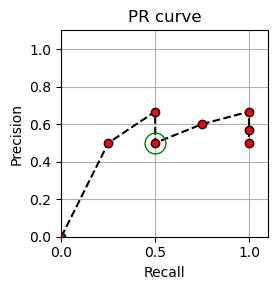

(<Figure size 300x300 with 1 Axes>,
 <Axes: title={'center': 'PR curve'}, xlabel='Recall', ylabel='Precision'>)

In [22]:
plot_PR_curve(P_Q, R_Q, figsize=(3,3))